In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from arcs.generate import GraphGenerator
from arcs.traversal import Traversal
from arcs.generate import GenerateInitialConcentrations

graph = GraphGenerator().from_file(
    filename='../tests/test_dft_data.json',
    temperature=100,
    pressure=1
)

gic = GenerateInitialConcentrations(graph=graph).update_ic(
    {'H2O':30,'O2':10,'SO2':10,'H2S':10,'NO2':10}
    )

t = Traversal(graph=graph)

data = t.sample(initial_concentrations=gic,ncpus=10,nsamples=1000)

/Users/badw/github-projects/arcs/arcs/generate.py:255: RuntimeWarning: overflow encountered in exp
  K = np.exp(


In [30]:
random_compounds = t.get_weighted_random_compounds(gic)
random_compounds

{'H2O': 0.42857142857142866,
 'H2S': 0.14285714285714288,
 'SO2': 0.14285714285714288,
 'NO2': 0.14285714285714288}

In [31]:
random_reactions = t.get_weighted_reaction_rankings(random_compounds)
random_reactions

{208: 2.19109579601341,
 232: 5.607546271671159,
 297: 3.326945868514665,
 464: 7.535161099303656}

In [35]:
t.choose_reaction(random_reactions)

208

In [39]:
graph.nodes[464]

{'reaction': {'reaction_string': '2 H2O + 1 H2S = 3 H2 + 1 SO2',
  'reactants': {'H2O': 2, 'H2S': 1},
  'products': {'H2': 3, 'SO2': 1}},
 'equilibrium_constant': 0.0}

In [25]:
from arcs.analysis import AnalyseSampling
import pandas as pd 

analysis = AnalyseSampling() #use_markdown=True,use_latex=True)
pd.Series(analysis.reaction_statistics(data))

2 H2O + 2 SO2 = 2 H2S + 3 O2    765
dtype: int64

In [26]:
average_data = analysis.average_sampling(data)
#average_data = average_data.loc[~(average_data==0).all(axis=1)]
average_data

,initial,mean,diff,std
H2S,10.0,3.333333e+00,-6.666667,4.235153e-15
O2,10.0,2.072184e-22,-10.000000,2.281951e-36
H2SO3,0.0,0.000000e+00,0.000000,0.000000e+00
H2O,30.0,3.666667e+01,6.666667,3.626139e-13
H2,0.0,0.000000e+00,0.000000,0.000000e+00
CO2,0.0,0.000000e+00,0.000000,0.000000e+00
CH4,0.0,0.000000e+00,0.000000,0.000000e+00
CH3COOH,0.0,0.000000e+00,0.000000,0.000000e+00
CO,0.0,0.000000e+00,0.000000,0.000000e+00
CH3OH,0.0,0.000000e+00,0.000000,0.000000e+00


<Axes: >

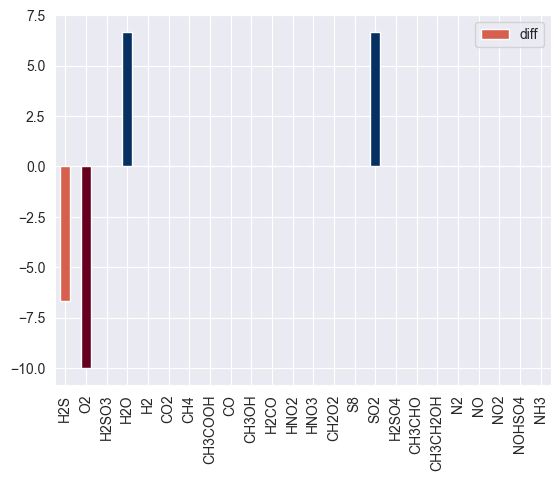

In [27]:
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

sns.set_style('darkgrid')
sns.set_palette('pastel')


norm = colors.Normalize(vmin=average_data['diff'].min(), vmax=average_data['diff'].max())
cmap = cm.RdBu  # or any other colormap

bar_colors = [cmap(norm(value)) for value in average_data['diff']]

average_data.plot.bar(y='diff',yerr='std',color=bar_colors)

/Users/badw/miniconda3/envs/py311/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


Error in callback <function _draw_all_if_interactive at 0x16e674180> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

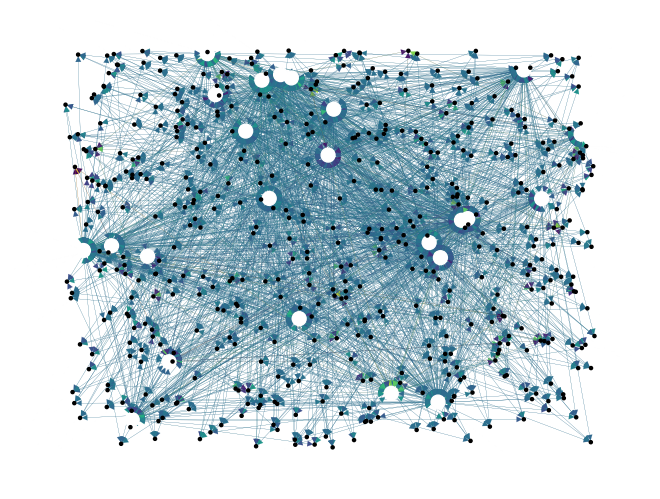

In [5]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np 
G = graph 

node_colours= []
node_sizes = []
for node in list(G.nodes):
    if isinstance(node,int):
        node_colours.append('black')
        node_sizes.append(5)
    else:
        node_colours.append('white')
        node_sizes.append(100)

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
vmin = np.min(weights)
vmax = np.max(weights)
cmap = plt.cm.viridis

nx.draw_random(G,node_color=node_colours,node_size=node_sizes,edgelist=edges,edge_color=weights,width=0.1,edge_cmap=cmap,vmin=vmin,vmax=vmax)

### Speed Test 

In [ ]:
from arcs.traversal import Traversal
from arcs.generate import GenerateInitialConcentrations

gic = GenerateInitialConcentrations(graph=graph).update_ic({'H2O':100,'H2':30,'O2':50,'H2S':100,'NO2':200,'N2':300})
t = Traversal(graph=graph)

In [ ]:
data = t.sample(initial_concentrations=gic,ncpus=1)

In [ ]:
data = t.sample(initial_concentrations=gic,ncpus=2)

In [ ]:
data = t.sample(initial_concentrations=gic,ncpus=4)

In [ ]:
data = t.sample(initial_concentrations=gic,ncpus=10)